In [1]:
import pandas as pd
import numpy as np
import os
if os.getcwd().split('/')[-1] == 'Workshop-simulator':
    os.chdir('..')
from main import main, input_ranges, all_need, base_need
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm
import matplotlib.patches as patches

input_ranges

{'n_cars': range(0, 10001, 10),
 'weekday_starthour': range(0, 24),
 'weekday_startmin': range(0, 31, 30),
 'weekday_endhour': range(0, 24),
 'weekday_endmin': range(0, 31, 30),
 'holiday_starthour': range(0, 24),
 'holiday_startmin': range(0, 31, 30),
 'holiday_endhour': range(0, 24),
 'holiday_endmin': range(0, 31, 30),
 'charge_on_road': [True, False],
 'service_lev': range(1, 11),
 'once_fare': range(0, 3001)}

In [6]:

input_ranges['n_cars'] = range(7000, 10001, 1000)
input_ranges['weekday_starthour'] = [0]
input_ranges['weekday_startmin'] = [0]
input_ranges['weekday_endhour'] = [0]
input_ranges['weekday_endmin'] = [0]
input_ranges['holiday_starthour'] = [0]
input_ranges['holiday_startmin'] = [0]
input_ranges['holiday_endhour'] = [0]
input_ranges['holiday_endmin'] = [0]
input_ranges['once_fare'] = range(100, 801, 50)
input_ranges['service_lev'] = range(1, 9, 2)


In [7]:
a = 1
for v in input_ranges.values():
    print(list(v))
    a *= len(v)
a

[7000, 8000, 9000, 10000]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[True, False]
[1, 3, 5, 7]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]


480

In [8]:
keys, values = zip(*input_ranges.items())
all_input_combinations = [dict(zip(keys, v)) for v in product(*values)]

In [9]:
profit, benefit = [], []
for i in tqdm(range(len(all_input_combinations))):
    p, b, _ = main(all_input_combinations[i], input_ranges, all_need, base_need, mode = 'A')
    profit.append(p)
    benefit.append(b)


100%|██████████| 480/480 [03:16<00:00,  2.44it/s]


In [10]:
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i], i] for i in range(len(Xs))], reverse=maxX)
    pareto_front = [sorted_list[0]]
    
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]: # Look for higher values of Y…
                pareto_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= pareto_front[-1][1]: # Look for lower values of Y…
                pareto_front.append(pair) # … and add them to the Pareto frontier
    
    return pareto_front


In [11]:
result1 = pd.read_csv('results/maeda/result.csv', index_col=0)
result2 = pd.read_csv('results/wang/result.csv', index_col=0)

In [23]:
for p in pareto_optimal_combinations:
    print(all_input_combinations[p[2]])

{'n_cars': 10000, 'weekday_starthour': 0, 'weekday_startmin': 0, 'weekday_endhour': 0, 'weekday_endmin': 0, 'holiday_starthour': 0, 'holiday_startmin': 0, 'holiday_endhour': 0, 'holiday_endmin': 0, 'charge_on_road': False, 'service_lev': 1, 'once_fare': 650}
{'n_cars': 10000, 'weekday_starthour': 0, 'weekday_startmin': 0, 'weekday_endhour': 0, 'weekday_endmin': 0, 'holiday_starthour': 0, 'holiday_startmin': 0, 'holiday_endhour': 0, 'holiday_endmin': 0, 'charge_on_road': True, 'service_lev': 1, 'once_fare': 650}
{'n_cars': 10000, 'weekday_starthour': 0, 'weekday_startmin': 0, 'weekday_endhour': 0, 'weekday_endmin': 0, 'holiday_starthour': 0, 'holiday_startmin': 0, 'holiday_endhour': 0, 'holiday_endmin': 0, 'charge_on_road': False, 'service_lev': 1, 'once_fare': 600}
{'n_cars': 10000, 'weekday_starthour': 0, 'weekday_startmin': 0, 'weekday_endhour': 0, 'weekday_endmin': 0, 'holiday_starthour': 0, 'holiday_startmin': 0, 'holiday_endhour': 0, 'holiday_endmin': 0, 'charge_on_road': True, 's

In [12]:
base_input_ranges = {
    # more cost, and able to satisfy more demand
    'n_cars': range(0, 10001, 10),

    # time depends how many demand the cars are serving

    'weekday_starthour': range(0, 24),
    'weekday_startmin': range(0, 31, 30),
    'weekday_endhour': range(0, 24),
    'weekday_endmin': range(0, 31, 30),
    'holiday_starthour': range(0, 24),
    'holiday_startmin': range(0, 31, 30),
    'holiday_endhour': range(0, 24),
    'holiday_endmin': range(0, 31, 30),

    # more cost, but car can save charging time to serve more demand
    'charge_on_road': [True, False],

    # more cost, but can facilitate demand
    'service_lev': range(1, 11),

    # lead to lower demand
    'once_fare': range(0, 3001)  # yen
}

38


15it [00:06,  2.31it/s]


38


13it [00:05,  2.24it/s]


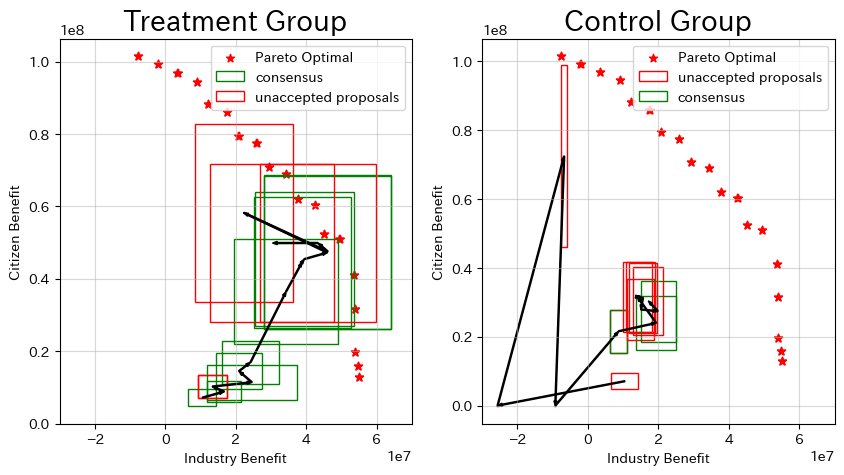

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


for i, result in enumerate([result2, result1]):
    rectangles = []
    centroids = []
    x = []
    y = []

    xx, yy = np.array(profit).mean(axis=1), np.array(benefit).mean(axis=1)

    pareto_optimal_combinations = pareto_frontier(xx, yy)
    print(len(pareto_optimal_combinations))
    x_pareto = [point[0] for point in pareto_optimal_combinations]
    y_pareto = [point[1] for point in pareto_optimal_combinations]
    axs[i].scatter(x_pareto, y_pareto, c='red', marker='*', label='Pareto Optimal')

    for j, row in tqdm(result.iterrows()):

        
        input_values = {k: v for k, v in zip(input_ranges.keys(), row[2:])}
        p, _, b = main(input_values, base_input_ranges,all_need, base_need, mode='A')
        x+= [p[0], p[0], p[1], p[1]]
        y += [b[0], b[1], b[0], b[1]]
        
        if row[-1]=='Yes':
            color = 'green'
            label = 'consensus'
        else:
            color = 'red'
            label = 'unaccepted proposals'
        
        rectangle = patches.Rectangle((p[0], b[0]), p[1]-p[0], b[1]-b[0], linewidth=1, edgecolor=color, facecolor='none', alpha=1, label=label)
        rectangles.append(rectangle)
        centroids.append((np.mean(p), np.mean(b)))

    for rectangle in rectangles:
        axs[i].add_patch(rectangle)

# Ensure labels only added once to the legend
    handles, labels = axs[i].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    for k in range(len(centroids)-1):
        axs[i].arrow(centroids[k][0], centroids[k][1], centroids[k+1][0] - centroids[k][0], centroids[k+1][1] - centroids[k][1], 
                length_includes_head=True, width = 30_0000, fc='k', ec='k') # change the head_width based on your actual data range
    axs[i].set_title('Control Group' if i==1 else 'Treatment Group', fontsize=20)
    axs[i].set_xlabel('Industry Benefit')
    axs[i].set_ylabel('Citizen Benefit')
    axs[i].set_xlim(-3E7, 7E7)
    axs[i].grid(True, alpha = 0.5)
    axs[i].legend(by_label.values(), by_label.keys())  # Ensures only one entry per label

plt.show()